In [236]:
#Importing stuff
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import csv
import spacy

#Bring file with info. 
file = open("clean_text.csv", encoding="utf8")
data = list(csv.reader(file, delimiter=","))

In [237]:
# input list of lists (nested list)
data

# creating a new empty list for storing result
resultList = []

# Traversing in till the length of the input list of lists
for m in range(len(data)):
    for n in range (len(data[m])):
        resultList.append(data[m][n])

# printing the resultant list after joining the list of lists
MergedTweets = resultList
MergedTweets.pop(0)
MergedTweets.pop(0)

'Tweet Comment'

In [238]:
Tweets = pd.DataFrame()

In [239]:
Tweets ["Text"] = pd.DataFrame(MergedTweets)

In [240]:
# Ok, so now we're about to Clean the text, removing unnecesary info, using a function:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', " ", text) #Removing @mentions
    text = re.sub(r'#', "", text) #Removing the #hashtags
    text = re.sub(r'"RT[\s]+', " ",text) #Removig RetWeets
    text = re.sub(r'http' or 'https' or 'https ' or 'http ', " ", text) #Removing URLs
    text = re.sub(r'Twitter' or "twitter" or "Twitter " or "twitter ", " ", text) #Removing the word "Twitter"
    text = re.sub(r'elonmusk', " ", text) #Removing "elonmusk"
    text = re.sub(r'  ', "", text) #Removing "elonmusk"
    return text

Tweets ["Text"] = Tweets["Text"].apply(cleanTxt)

In [241]:
from nltk.tokenize import word_tokenize
joint_words = ' '.join(Tweets ["Text"])
separated_words = word_tokenize(joint_words)

In [242]:
# Create functions for the text subjectivity, polarity and sentiment analysis:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#This one, is the relative score, depending on polarity value
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [243]:
Tweets ["Subjectivity"] = Tweets["Text"].apply(getSubjectivity)
Tweets ["Polarity"] = Tweets["Text"].apply(getPolarity)
Tweets ["Sentiment Analysis"] = Tweets["Polarity"].apply(getAnalysis)
Tweets

,Text,Subjectivity,Polarity,Sentiment Analysis
0,007McCrypto1 j jexxa RAZ0RFIST Oooo never hea...,0.200000,0.200000,Positive
1,coldwarsteve Wows t co UYs1bO3pgn,0.000000,0.000000,Neutral
2,Patrick08207587 SkullatorNZ PositivityNews1 j...,0.000000,0.000000,Neutral
3,Brz an,0.000000,0.000000,Neutral
4,Can be get a laugh emoji for now,0.100000,0.300000,Positive
...,...,...,...,...
62578,Write2Fite Wows t co EIw0kfzo0b,0.000000,0.000000,Neutral
62579,XavierHelgesen Amazing idea it is like Angell...,0.900000,0.600000,Positive
62580,yogeshwadkar PRSundar64 to the moons t co cnT...,0.000000,0.000000,Neutral
62581,yoyohayli branjustvibing Lulubel29765509 jmbl...,0.666667,0.133333,Positive


In [78]:
Tweets.to_csv("Tweets.csv",index=False)

In [244]:
#Removing stop words, as "The, "to," and", etc.        
nlp = spacy.load('en_core_web_sm')
even_cleaner = []
for word in separated_words:
    if len(word) <= 1:
        False
    if word not in spacy.lang.en.STOP_WORDS:
        even_cleaner.append(word)

cleanest_by_words = [item for item in even_cleaner if len(item) > 1]

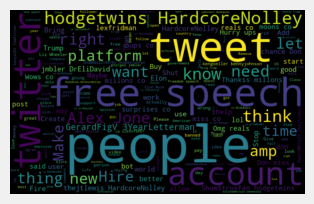

In [335]:
#Let's make it more visual, with word clouds and graphs!
full_text = " ".join([twts for twts in cleanest_by_words])
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 140).generate(full_text)

#platmodlib!
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [330]:
Words = pd.DataFrame()
Words ["Words"] = pd.DataFrame(cleanest_by_words)
Words.value_counts()

Words         
co                9244
HardcoreNolley    6349
people            3965
like              3132
You               2873
                  ... 
Ukranian             1
Ukranians            1
Ukro                 1
Ukrop                1
zzzz                 1
Length: 55270, dtype: int64

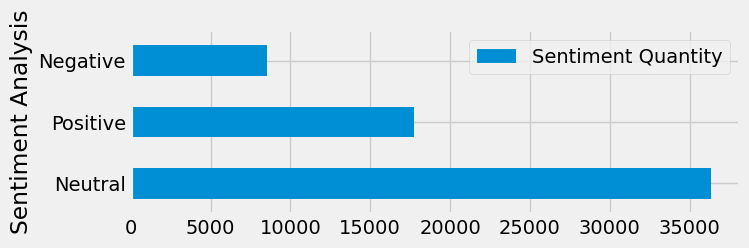

In [309]:
#Setting chart size, and generating it.
plt.rcParams["figure.figsize"] = (7, 2) 
Sentiment = pd.DataFrame({'Sentiment Analysis': ["Neutral","Positive","Negative"], 'Sentiment Quantity': Tweets ["Sentiment Analysis"].value_counts()})
ax = Sentiment.plot.barh(x='Sentiment Analysis', y='Sentiment Quantity')

In [359]:
Tweets ["Sentiment Analysis"].value_counts()

Neutral     36327
Positive    17720
Negative     8536
Name: Sentiment Analysis, dtype: int64

In [360]:
Tweets ["Sentiment Analysis"].value_counts(normalize=True).mul(100).round(1).astype(str)

Neutral     58.0
Positive    28.3
Negative    13.6
Name: Sentiment Analysis, dtype: object